<a href="https://colab.research.google.com/github/sadnyd/Employee-Attrition/blob/main/ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve,  ConfusionMatrixDisplay


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset_path = '/content/drive/My Drive/dataset'

In [7]:
df = pd.read_csv(f'{dataset_path}/ibmHR.csv')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# Univariate Analysis
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

In [10]:
# Checking missing values
print("Missing values:\n", df.isna().sum())

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [13]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

In [9]:
# Class distribution (Attrition)
fig = px.pie(values=df['Attrition'].value_counts().values, names=df['Attrition'].value_counts().index)
fig.update_layout(title="Attrition Distribution")
fig.show()

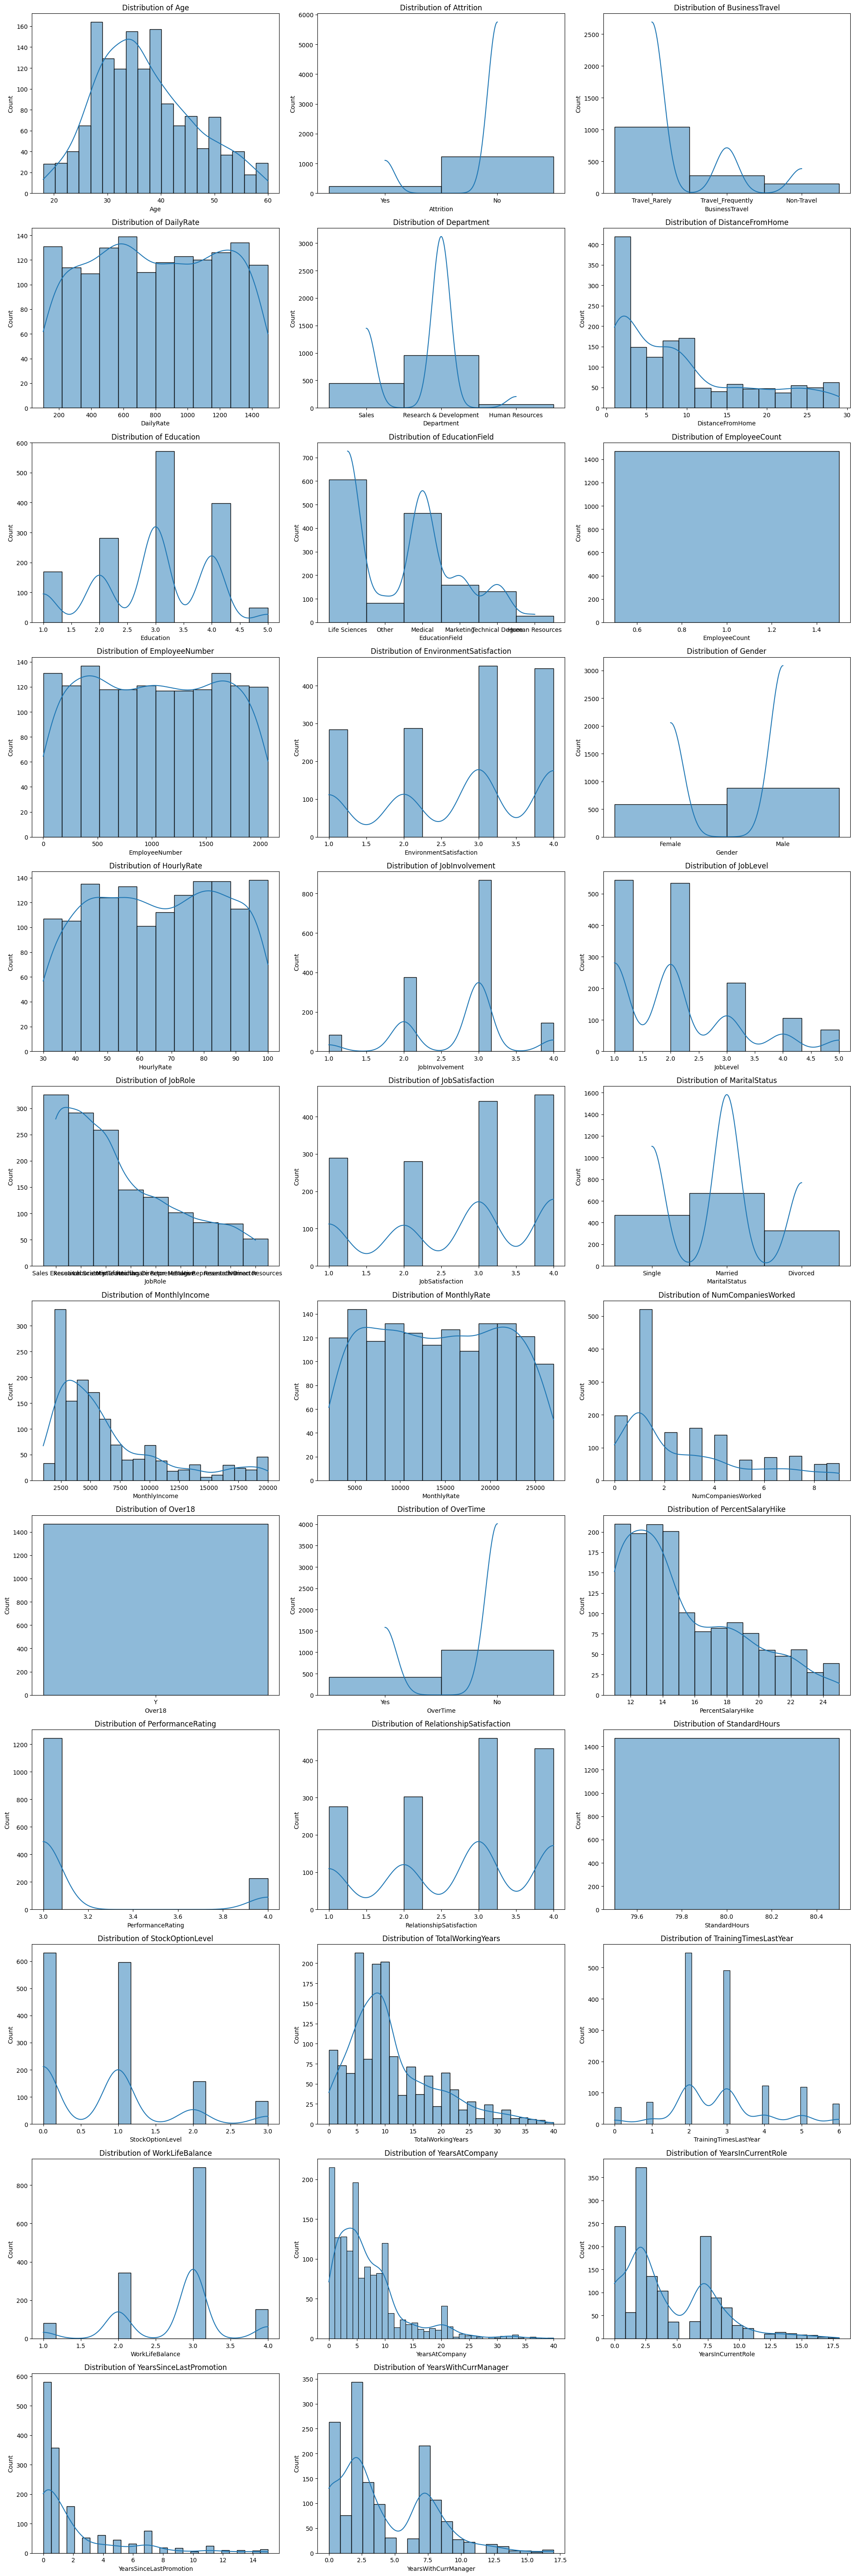

In [15]:
# Univariate Distributions for All Columns
import math

# Setting up the number of rows and columns for the subplot grid
num_cols = df.shape[1]
num_rows = math.ceil(num_cols / 3)  # 3 plots per row

plt.figure(figsize=(20, num_rows * 5))

# Loop through all columns and create a histogram plot with KDE for each
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [16]:
# Correlation Matrix
# Encoding categorical columns for correlation analysis
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

In [20]:
# Label encode all categorical features for correlation calculation
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save the encoder

In [21]:
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

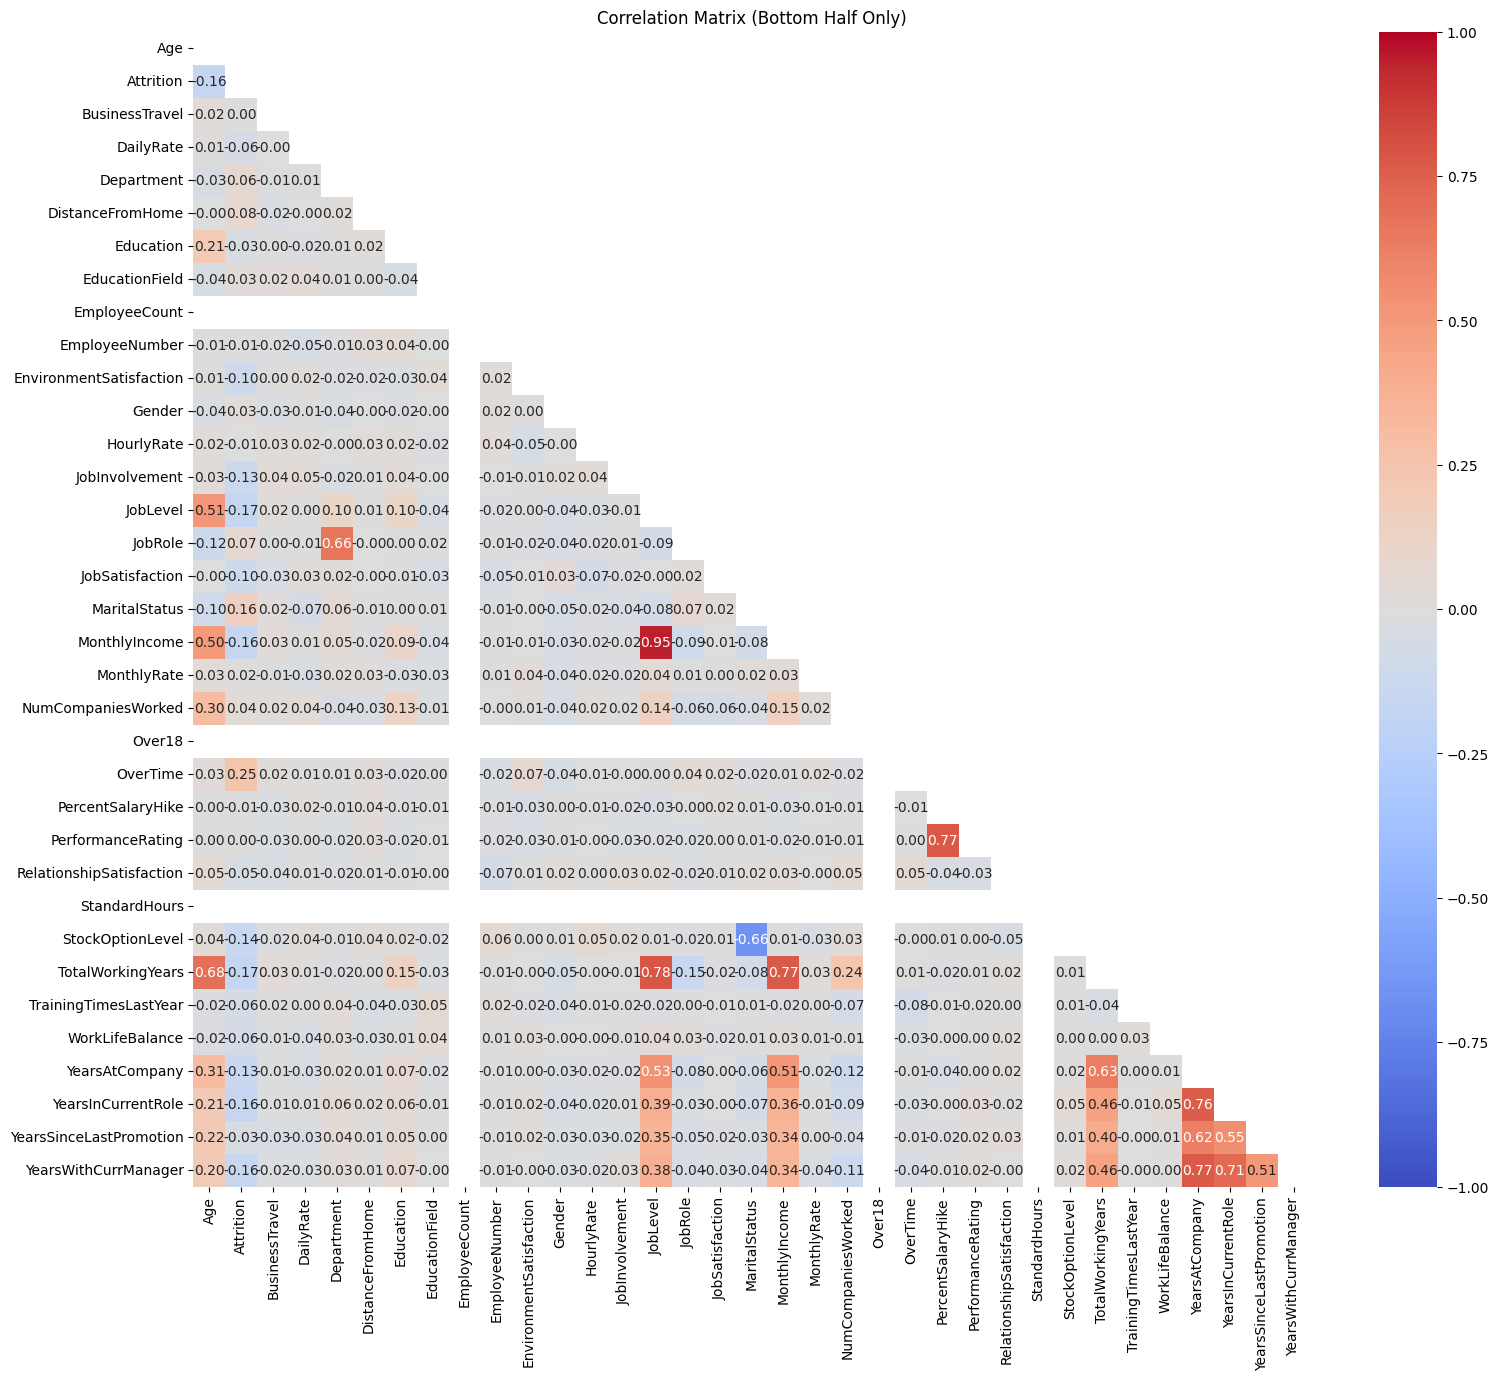

In [23]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Plot the heatmap with the mask applied to the upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Bottom Half Only)")
plt.show()


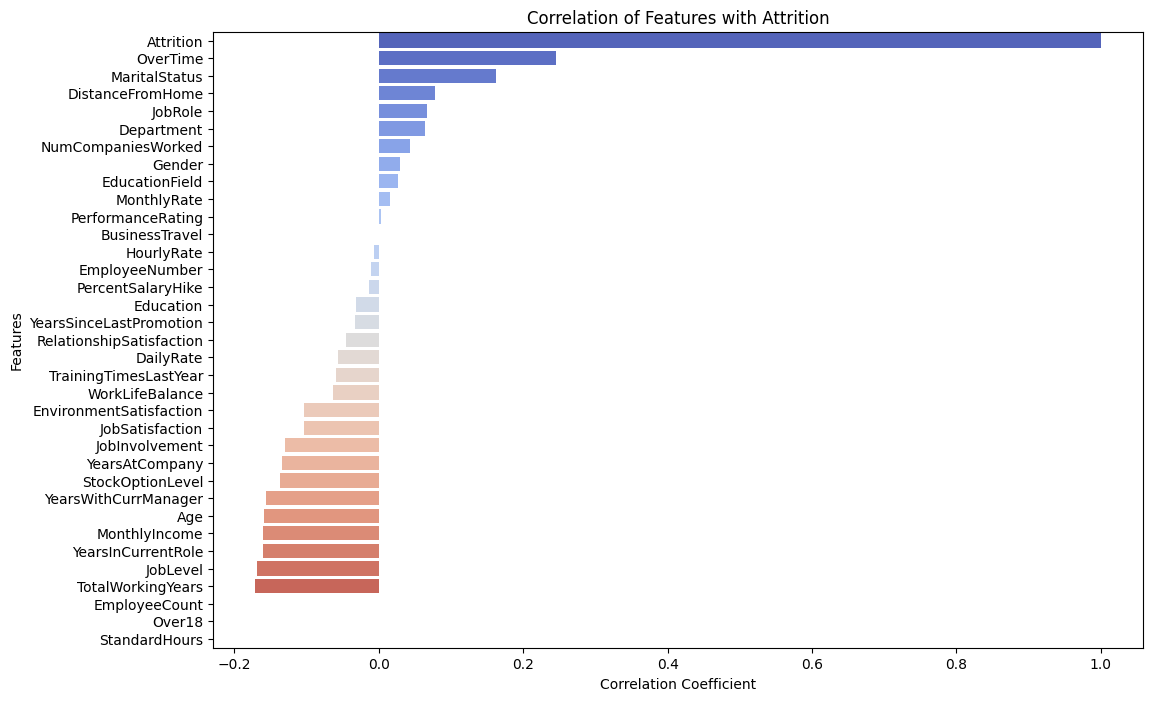

In [28]:
correlation_target = correlation_matrix["Attrition"].sort_values(ascending=False)

# Plotting the bar graph of the sorted correlation values
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_target.values, y=correlation_target.index, hue=correlation_target.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Correlation of Features with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


In [30]:
# Identifying low correlation columns with 'Attrition'
attrition_corr = correlation_matrix["Attrition"].abs().sort_values()
low_corr_columns = attrition_corr[attrition_corr < 0.05].index.tolist()
print("\nColumns with low correlation with Attrition (< 0.05):")
print(low_corr_columns)



Columns with low correlation with Attrition (< 0.05):
['BusinessTravel', 'PerformanceRating', 'HourlyRate', 'EmployeeNumber', 'PercentSalaryHike', 'MonthlyRate', 'EducationField', 'Gender', 'Education', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'RelationshipSatisfaction']


In [31]:
# Drop columns with low correlation to Attrition
df = df.drop(columns=low_corr_columns)

In [32]:
#Separating features and target
y = df['Attrition']
X = df.drop(columns=['Attrition'])

In [34]:
import os
import numpy as np

# Create the 'saved' directory if it doesn't exist
os.makedirs('./saved', exist_ok=True)

# Save label encoders for future use
np.save('./saved/label_encoders.npy', label_encoders)


In [35]:
# Encoding remaining categorical features
categorical_cols = X.select_dtypes(include='object').columns

# Label encoding and one-hot encoding for model training
for col in categorical_cols:
    if X[col].nunique() <= 3:  # Apply Label Encoding if few categories
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
    else:  # Apply One-Hot Encoding if many categories
        X = pd.get_dummies(X, columns=[col])

# Save label encoders for future use
np.save('./saved/label_encoders.npy', label_encoders)

In [36]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [37]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Model Training and Evaluation Functions
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    print('\033[1m' + 'Confusion Matrix' + '\033[0m')
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    plt.show()

    print('\033[1m' + 'Classification Report' + '\033[0m')
    print(classification_report(y_test, y_pred))

    # ROC and Precision-Recall Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    yhat = classifier.predict_proba(X_test)
    pos_probs = yhat[:, 1]
    fpr, tpr, _ = roc_curve(y_test.map({'No': 0, 'Yes': 1}), pos_probs)
    plt.plot(fpr, tpr, marker='.', label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    print('\033[1m' + 'ROC AUC Score:' + '\033[0m', roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), pos_probs))
    plt.show()

    no_skill = len(y_test[y_test == "Yes"]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    precision, recall, _ = precision_recall_curve(y_test.map({'No': 0, 'Yes': 1}), pos_probs)
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    print('\033[1m' + 'Precision-Recall AUC Score:' + '\033[0m', auc(recall, precision))
    plt.show()


Naive Bayes Classifier:
Confusion Matrix


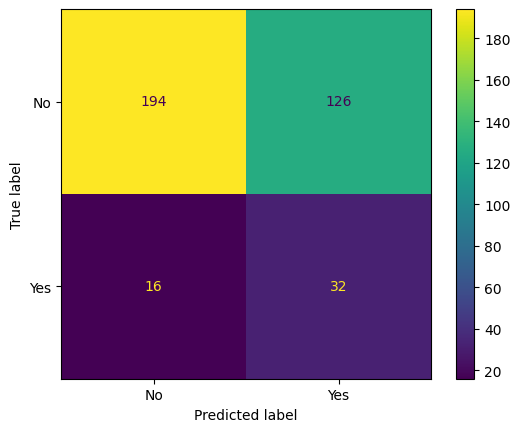

Classification Report
              precision    recall  f1-score   support

          No       0.92      0.61      0.73       320
         Yes       0.20      0.67      0.31        48

    accuracy                           0.61       368
   macro avg       0.56      0.64      0.52       368
weighted avg       0.83      0.61      0.68       368

ROC AUC Score: 0.6945963541666667


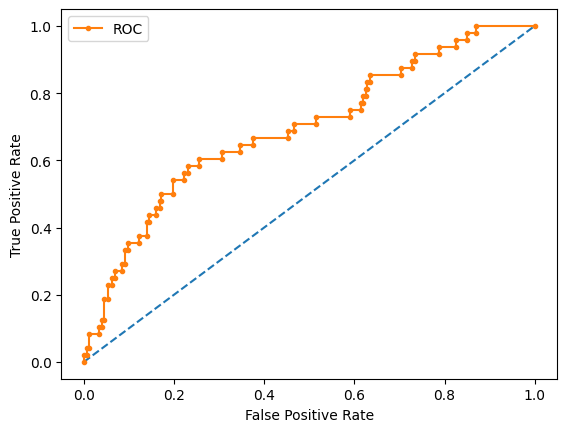

Precision-Recall AUC Score: 0.2792753771115384


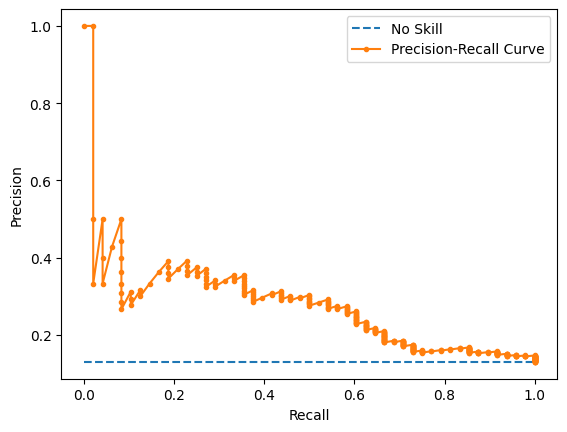

In [45]:
    # Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
print("Naive Bayes Classifier:")
evaluate_model(nb_classifier, X_test, y_test)

Random Forest Classifier:
Confusion Matrix


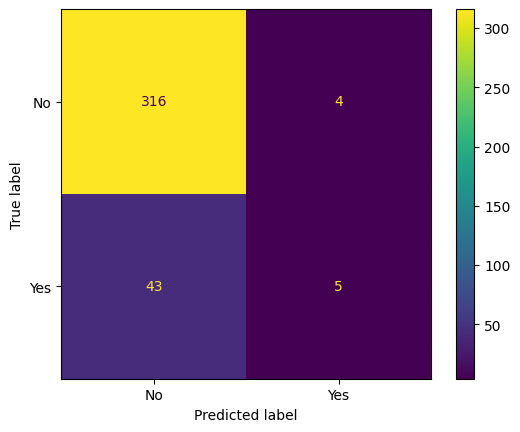

Classification Report
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       320
         Yes       0.56      0.10      0.18        48

    accuracy                           0.87       368
   macro avg       0.72      0.55      0.55       368
weighted avg       0.84      0.87      0.83       368

ROC AUC Score: 0.7829427083333332


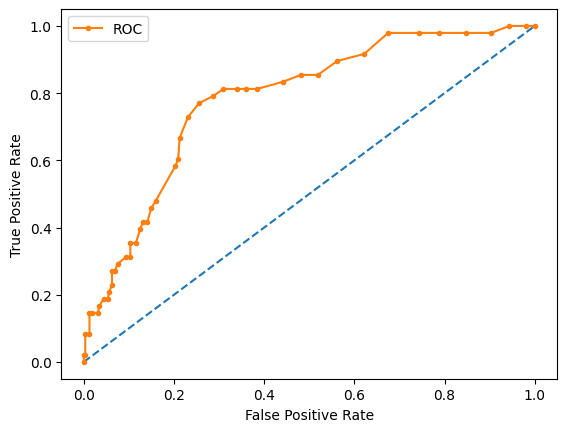

Precision-Recall AUC Score: 0.35388927206630366


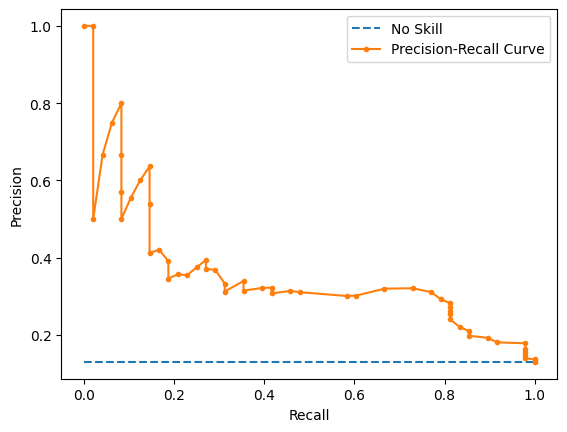

In [46]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_classifier.fit(X_train, y_train)
print("Random Forest Classifier:")
evaluate_model(rf_classifier, X_test, y_test)